# Outline:

1. Explore dataset
   * Missing or null values
   * Distributions
   * Summary statistics

2. Multicollinearity
   * Correlation matrix

3. Categorical variable 

4. Outlier analysis

5. Model building from Scratch
   * Split dataset into train and test set
   * Define and fit the model
   * Model summary
   * Summary statistics
   * Model adequacy checking

6. Conclusion


# Import Libraries

In [1]:
import pandas as pd # For data Analysis
import numpy as np # working with arrays
import matplotlib.pyplot as plt #for visualization
import seaborn as sns # for visualizing

# Read Dataset

In [2]:
data=pd.read_csv("Fish.csv")

In [3]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
print("The columns are:",data.columns)
print("*****-------------------------*****")
print("The shape of the dataset:",data.shape)

The columns are: Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')
*****-------------------------*****
The shape of the dataset: (159, 7)


#### Column descriptions
Weight - weight of fish in grams <br>
Length1 - vertical length in cm<br>
Length2 - Diagonal length in cm<br>
Length3 - Cross length in cm<br>
Height - height in cm<br>
Width - Diagonal width in cm

In [5]:
# rename the columns
df = data.rename({'Length1':'Vertical_Length', 'Length2':'Diagonal_Length', 'Length3':'Cross_Length'}, axis='columns')

In [6]:
df.head(3)

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


# Check Datatype 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Species          159 non-null    object 
 1   Weight           159 non-null    float64
 2   Vertical_Length  159 non-null    float64
 3   Diagonal_Length  159 non-null    float64
 4   Cross_Length     159 non-null    float64
 5   Height           159 non-null    float64
 6   Width            159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
df.describe()

,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Notes

Notice there are some values where the weight is equal to zero, which is impossible, so it may be an input error and could possibly remove those values
I should maybe explore each category of species to see if any might be out of the ordinary there

In [9]:
# Weight cannot be 0g, so should look at those values
zeros = df[df['Weight'] == 0]
zeros

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


This fish cannot possibly weigh 0g, so we will assume for our example that maybe the value was input in error, and will delete this record

In [10]:
# new df with 0 value removed and view summary statistics
df1 = df[df['Weight'] != 0]
df1.describe() 

,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
# Find the null values
data.isnull().sum() 

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [12]:
df.describe(include='object')

,Species
count,159
unique,7
top,Perch
freq,56


In [13]:
s=data['Species'].unique()
s

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [14]:
df.duplicated().value_counts()

False    159
dtype: int64

In [15]:
aa = df.groupby('Species')['Weight', 'Vertical_Length', 'Diagonal_Length', 'Cross_Length','Height','Width'].mean()
aa

<ipython-input-15-2abde9ecbf4f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aa = df.groupby('Species')['Weight', 'Vertical_Length', 'Diagonal_Length', 'Cross_Length','Height','Width'].mean()


,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


# Fish Name to Numberic

In [16]:
df['Species'].value_counts().keys()

Index(['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish'], dtype='object')

In [17]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

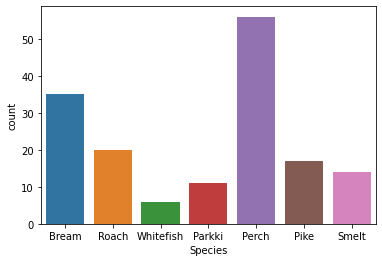

In [18]:
sns.countplot(x=df.Species)
plt.show()

In [19]:
df['Species'] = df['Species'].replace({'Perch':0, 'Bream':1, 'Roach':2, 'Pike':3, 'Smelt':4, 'Parkki':5, 'Whitefish':6})

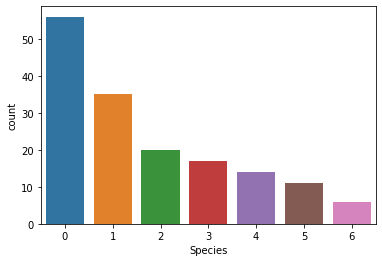

In [20]:
sns.countplot(x=df.Species)
plt.show()

In [21]:
df.sample(3)

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
135,3,510.0,40.0,42.5,45.5,6.8250,4.459
24,1,700.0,31.9,35.0,40.5,16.2405,5.589
54,2,390.0,29.5,31.7,35.0,9.4850,5.355


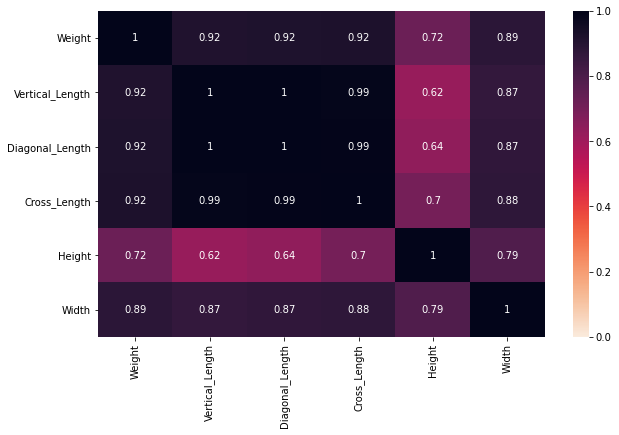

In [22]:
# make figure a bit bigger
plt.figure(figsize=(10,6))

# correlation heatmap
sns.heatmap(df1.corr(), annot=True, vmin=0, vmax=1, cmap="rocket_r")
plt.show()

Text(0.5, 0, 'Diagonal width (cm)')

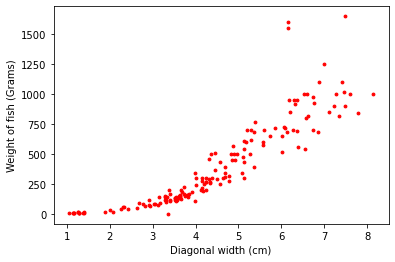

In [23]:
x = df.Width.values.reshape(-1, 1)
y = df.Weight.values.reshape(-1, 1)

plt.scatter(x, y, s = 8, c = "red")
plt.ylabel("Weight of fish (Grams)")
plt.xlabel("Diagonal width (cm)")

In [24]:
# Detect outlier
# Outlier Detection using Tnter Quantile Range 
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier counter of the all features")
((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum()

outlier counter of the all features


<ipython-input-24-ba7c2409fede>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum()
<ipython-input-24-ba7c2409fede>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum()


Height     0
Length1    3
Length2    3
Length3    1
Species    0
Weight     3
Width      0
dtype: int64

In [25]:
## Outliers replace using Mean
for col in data.columns:
    if data[col].dtypes !='object':
        q1,q3=data[col].quantile(0.25),data[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        data[col] = np.where(data[col]>ul,data[col].mean(),np.where(data[col]<ll,data[col].mean(),data[col]))
       

In [26]:
# Detect outlier
# Outlier Detection using Tnter Quantile Range 
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier counter of the all features")
((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum()

outlier counter of the all features


<ipython-input-26-ba7c2409fede>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum()
<ipython-input-26-ba7c2409fede>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum()


Height     0
Length1    1
Length2    0
Length3    0
Species    0
Weight     0
Width      0
dtype: int64

Select the dependent and independent variable
* Dependent variable- Weight
* independent variable- size and length

In [27]:
#Split the Data in x and y
y = df.iloc[:, 1].values  # we choose here y as arbitrary output / dependent variable
X = df.iloc[:,2:].values  # we choose here x as arbitrary input / independent variable 

# Here we choose predicted variable is weight

In [28]:
y.shape

(159,)

In [29]:
X.shape

(159, 5)

In [53]:

import math 
import operator


eps = np.finfo(float).eps

def rmse_score(y_true, y_pred):

    """ rmse score = sqrt((sum[i=0 to n](y_true - y_pred)) / len(y_true)) """

    return np.sqrt((np.subtract(y_pred, y_true) ** 2).sum()/len(y_true))

def train_test_split(x, y, test_size = 0.25, random_state = None):

    """ partioning the data into train and test sets """

    x_test = x.sample(frac = test_size, random_state = random_state)
    y_test = y[x_test.index]

    x_train = x.drop(x_test.index)
    y_train = y.drop(y_test.index)

    return x_train, x_test, y_train, y_test




class ID3DecisionTreeRegressor: #class is used to create user-defined structure

    def __init__(self, max_depth = None, min_sample_leaf = 3,min_sample_split=2):

        self.depth = 0 #Depth of the tree
        self.max_depth = max_depth	#Maximum depth of the tree
        self.min_sample_leaf = min_sample_leaf	#Minimum number of samples for each node
        self.min_sample_split =min_sample_split
        self.coefficient_of_variation = 10 	#Stopping Criterion

        self.features = list
        self.X_train = np.array
        self.y_train = np.array
        self.num_feats = int 
        self.train_size = int 

    def fit(self, X, y):

        self.X_train = X 
        self.y_train = y
        self.features = list(X.columns)
        self.train_size = X.shape[0]
        self.num_feats = X.shape[1]

        df = X.copy()
        df['target'] = y.copy()

        #Builds Decision Tree
        self.tree = self._build_tree(df)

        print("\nDecision Tree(depth = {}) : \n {}".format(self.depth, self.tree))

    def _build_tree(self, df, tree = None):

        """
            Args:
                df: current number of rows available for splitting(decision making)
        """

        #Get feature with minimum score
        feature, cutoff = self._find_best_split(df)

        if cutoff is None:
            return tree

        #Initialization of tree
        if tree is None:
            tree = {}
            tree[feature] = {}

        #Left Child
        new_df = self._split_rows(df, feature, cutoff, operator.le)

        target_coef_of_var = self._coef_ov(new_df['target'])

        self.depth += 1

        if(target_coef_of_var < self.coefficient_of_variation or len(new_df) <= self.min_sample_leaf): #pure group
            tree[feature]['<=' + str(cutoff)] = new_df['target'].mean()
        else:
            if self.max_depth is not None and self.depth >= self.max_depth:
                tree[feature]['<=' + str(cutoff)] = new_df['target'].mean()
            else:
                tree[feature]['<=' + str(cutoff)] = self._build_tree(new_df)


        #Right Child
        new_df = self._split_rows(df, feature, cutoff, operator.gt)

        target_coef_of_var = self._coef_ov(new_df['target'])

        if(target_coef_of_var < self.coefficient_of_variation or len(new_df) <= self.min_sample_leaf): #pure group
            tree[feature]['>' + str(cutoff)] = new_df['target'].mean()
        else:
            if self.max_depth is not None and self.depth >= self.max_depth:
                tree[feature]['>' + str(cutoff)] = new_df['target'].mean()
            else:
                tree[feature]['>' + str(cutoff)] = self._build_tree(new_df)

        return tree

    def _coef_ov(self, y):

        """ calculates coefficient of variation:
            COV = (Mean of y / Standard Deviation of y) * 100
        """
        if(y.std() == 0):
            return 0
        coef_of_var = (y.mean()/y.std()) * 100

        return coef_of_var

    def _split_rows(self, df, feature, feat_val, operation ):

        """ split rows based on given criterion """

        return df[operation(df[feature], feat_val)].reset_index(drop = True)

    def _find_best_split(self, df):

        """
            Finds the column to split on first.
        """

        best_feature = str
        cutoff = None
        best_score = float('inf')


        for feature in list(df.columns[:-1]):

            score, threshold = self._find_feature_split(feature, df)

            if score < best_score:
                best_feature = feature
                best_score = score
                cutoff = threshold
        
        return best_feature, cutoff 

    def _find_feature_split(self, feature, df):

        best_score = float('inf')
        cutoff = float

        for val in df[feature]:
            left_child = df[feature][df[feature] <= val] 
            right_child = df[feature][df[feature] > val]

            if(len(left_child) > 0 and len(right_child) > 0):
                score = self._find_score(df, left_child, right_child)

                if score < best_score:
                    best_score = score
                    cutoff = val

        return best_score, cutoff


    def _find_score(self, df, lhs, rhs):

        y = df['target']

        lhs_std = y.iloc[lhs.index].std()
        rhs_std = y.iloc[rhs.index].std()

        if(np.isnan(lhs_std)):
            lhs_std = 0
        if(np.isnan(rhs_std)):
            rhs_std = 0

        return lhs_std * lhs.sum() + rhs_std * rhs.sum()

    def _predict_target(self, feature_lookup, x, tree):

        for node in tree.keys():
            val = x[node]
            if type(val) == str:
                tree = tree[node][val]
            else:
                cutoff = str(list(tree[node].keys())[0]).split('<=')[1]

                if(val <= float(cutoff)):   #Left Child
                    tree = tree[node]['<='+cutoff]
                else:                       #Right Child
                    tree = tree[node]['>'+cutoff]

            prediction = str

            if type(tree) is dict:
                prediction = self._predict_target(feature_lookup, x, tree)
            else:
                predicton = tree 
                return predicton

        return prediction   


    def predict(self, X):

        results= []
        feature_lookup = {key: i for i, key in enumerate(list(X.columns))}

        for index in range(len(X)):

            results.append(self._predict_target(feature_lookup, X.iloc[index], self.tree))

        return np.array(results)
    
        


In [54]:

if __name__ == '__main__':


    #Split Features and target
    X, y = data.drop([data.columns[0], data.columns[-1]], axis = 1), data[data.columns[-1]]

    #Split data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    dt_reg = ID3DecisionTreeRegressor()
    dt_reg.fit(X, y)
    
    print("\nTrain RMSE : {}".format(rmse_score(y_train, dt_reg.predict(X_train))))
    print("\nTest RMSE: {}".format(rmse_score(y_test, dt_reg.predict(X_test))))


    #dt_reg = ID3DecisionTreeRegressor(max_depth = 150)
    #dt_reg.fit(X, y)
    
    #print("\nTrain RMSE : {}".format(rmse_score(y_train, dt_reg.predict(X_train))))
    #print("\nTest RMSE: {}".format(rmse_score(y_test, dt_reg.predict(X_test))))


Decision Tree(depth = 86) : 
 {'Height': {'<=9.396': {'Height': {'<=5.082': {'Height': {'<=2.43': {'Height': {'<=1.972': 1.1186666666666667, '>1.972': {'Height': {'<=2.196': {'Height': {'<=2.0832': 1.2812, '>2.0832': 1.3938666666666666}}, '>2.196': {'Height': {'<=2.2044': 1.1484, '>2.2044': {'Height': {'<=2.277': 1.2351666666666665, '>2.277': 1.269}}}}}}}}, '>2.43': {'Height': {'<=4.1472': {'Height': {'<=3.528': 1.9818666666666667, '>3.528': 2.3499999999999996}}, '>4.1472': 2.7817000000000003}}}}, '>5.082': {'Height': {'<=6.9153': {'Height': {'<=5.6358': {'Height': {'<=5.568': {'Height': {'<=5.1992': 3.0801, '>5.1992': {'Height': {'<=5.2185': 3.626, '>5.2185': {'Height': {'<=5.2983': 3.07165, '>5.2983': 3.6853}}}}}}, '>5.568': 3.0430666666666664}}, '>5.6358': {'Height': {'<=6.561': {'Height': {'<=6.55': {'Height': {'<=6.4395': {'Height': {'<=6.216': {'Height': {'<=5.9532': {'Height': {'<=5.6925': 3.5825, '>5.6925': {'Height': {'<=5.7078': 4.158, '>5.7078': {'Height': {'<=5.9175': {'He

#### Still here its correct raa,   next i need to hyper parameter tuning from scratch

In [57]:
import itertools
import numpy as np

class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv

    def fit(self, data, labels):
        combinations = list(itertools.product(*self.param_grid.values()))
        results = []
        for combination in combinations:
            params = dict(zip(self.param_grid.keys(), combination))
            estimator = self.estimator(**params)
            scores = self._cross_val_score(estimator, data, labels)
            results.append((scores.mean(), params))

        self.best_params = max(results, key=lambda x: x[0])[1]
        self.best_estimator = self.estimator(**self.best_params)
        self.best_estimator.fit(data, labels)

    def _cross_val_score(self, estimator, data, labels):
        n_samples = len(data)
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        fold_sizes = np.full(self.cv, n_samples // self.cv, dtype=np.int)
        fold_sizes[:n_samples % self.cv] += 1
        current = 0
        scores = []
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            test_indices = indices[start:stop]
            train_indices = np.concatenate((indices[:start], indices[stop:]))
            train_data, train_labels = data[train_indices], labels[train_indices]
            test_data, test_labels = data[test_indices], labels[test_indices]
            estimator.fit(train_data, train_labels)
            predictions = estimator.predict(test_data)
            score = self._score(predictions, test_labels)
            scores.append(score)
            current = stop
        return np.array(scores)

    def _score(self, predictions, labels):
        return -np.mean((predictions - labels) ** 2)


In [59]:
# hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'standard_deviation_reduction': [True, False]
}
grid_search = GridSearchCV(ID3DecisionTreeRegressor, param_grid)
grid_search.fit(X, y)
print("Best parameters:", grid_search.best_params_)
print("Best score:", gridaz_search.best_score_)


TypeError: __init__() got an unexpected keyword argument 'min_samples_split'